In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.io.ascii import read
import fitsio

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dtype']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [63]:
pypath = os.path.join(os.sep, 'global', 'work', 'projects', 'legacysurvey', 'legacycentrals')
meertcat = os.path.join(pypath, 'meert_et_al_data_tables_v2')
mendelcat = os.path.join(pypath, 'UPenn_PhotDec_Mstar_mlMendel14.dat')
wisccat = os.path.join(pypath, 'UPenn_PhotDec_Mstar_mlPCAWiscM11.dat')

In [64]:
# Read the Mendel catalog
columns = ('GalCount', 'FlagSerExp', 'Mstar_Tab5_Pymorph',
           'Mstar_Tab5_Truncated', 'Mstar_Tab3_Pymorph',
           'Mstar_Tab3_Truncated', 'Mstar_Tab5_Mendel',
           'Mstar_Tab3_Mendel', 'Mstar_Tab5_cModel',
           'Mstar_Tab3_cModel')
dtype = np.dtype([(col, np.float) for col in columns])
allmendel = np.loadtxt(mendelcat, dtype=dtype)
#allmendel.dtype.names

In [65]:
# Keep good measurements and data.
#keep = (np.where(allmendel['FlagSerExp'] == 0) and np.where(allmendel['Mstar_Tab5_Pymorph'] > 0)
#        and np.where(allmendel['Mstar_Tab5_cModel'] > 0))[0]
#print('Keeping {} / {} measurements in the Mendel catalog.'.format(len(keep), len(allmendel)))
#mendel = allmendel[keep]

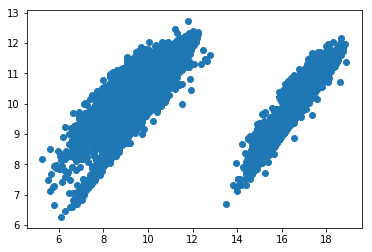

In [83]:
flags = (np.where(allmendel['FlagSerExp'] == 0))[0]
#print('Keeping {} / {} measurements in the Mendel catalog.'.format(len(keep), len(allmendel)))
mendel = allmendel[flags]
keep = (np.where(mendel['Mstar_Tab3_Pymorph'] > 0) and np.where(mendel['Mstar_Tab3_cModel'] > 0))[0]
mendel2 = mendel[keep]
plt.scatter(mendel2['Mstar_Tab3_cModel'], mendel2['Mstar_Tab3_Pymorph'])

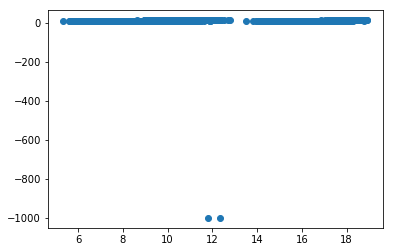

In [109]:
flags = (np.where(allmendel['FlagSerExp'] == 0))[0]
#print('Keeping {} / {} measurements in the Mendel catalog.'.format(len(keep), len(allmendel)))
mendel = allmendel[flags]
keep = (np.where(mendel['Mstar_Tab5_Pymorph'] > 0) and np.where(mendel['Mstar_Tab5_cModel'] > 0))[0]
mendel2 = mendel[keep]
plt.scatter(mendel2['Mstar_Tab5_cModel'], mendel2['Mstar_Tab5_Pymorph'])
# Something weird is going on here. Ugh

In [92]:
print(len(flags))
print(len(keep))

628919
619791


In [99]:
len(np.where(mendel['Mstar_Tab5_Pymorph'] > 0) and np.where(mendel['Mstar_Tab5_cModel'] > 0)[0])

619791

In [101]:
len(np.where(mendel['Mstar_Tab5_Pymorph'] > 0)[0])

620470